<a href="https://www.kaggle.com/code/utkarshtomar736/crick-pick-classifier?scriptVersionId=185048309" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Crick-Pick

This is the notebook for Crick-Pick a classfier model that detects cricket and baseball images.

In [1]:
!pip install wandb -q

In [2]:
from fastai.vision.all import *
from pathlib import Path
import shutil
import wandb

## Data

For the project we would be using a subset of kaggle dataset <name> by <user_name>
We would be filtering out 30 images from the cricket and baseball sub-folders and train and different models with different techniques on them and compare their results.

In [3]:
og_path = Path('/kaggle/input/cricket-football-baseball/cricket-football-baseball')

# Get the subdirectories for cricket and baseball:
cricket_path = og_path / 'cricket'
baseball_path = og_path / 'baseball'

# Filter .jpg images and select 30 images from each subfolder:
cricket_images = list(cricket_path.glob('*.jpg'))[:30]
baseball_images = list(baseball_path.glob('*.jpg'))[:30]

# Copy these images to a new directory 
output_dir = Path('/kaggle/working/selected_images')
output_dir.mkdir(parents=True, exist_ok=True)

cricket_output_dir = output_dir / 'Cricket'
cricket_output_dir.mkdir(parents=True, exist_ok=True)

baseball_output_dir = output_dir / 'Baseball'
baseball_output_dir.mkdir(parents=True, exist_ok=True)

# Copy cricket images
for img in cricket_images:
    shutil.copy(img, cricket_output_dir / img.name)

# Copy baseball images
for img in baseball_images:
    shutil.copy(img, baseball_output_dir / img.name)

### Selected Data
Using the selected (filtered out) data.

In [4]:
path = Path('/kaggle/working/selected_images')
cricket_30 = path/'Cricket'
baseball_30 = path/'Baseball'

In [5]:
cricket_pth = cricket_30.ls().sorted()
cricket_pth[0]

Path('/kaggle/working/selected_images/Cricket/0aa39c4a-195e-4b1b-a8ca-2e5ad08b484d.jpg')

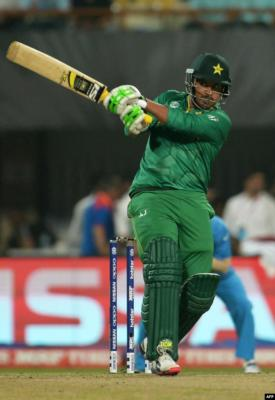

In [6]:
Image.open(cricket_pth[0])

In [7]:
def get_dls(bs, size):
  dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                     get_items=get_image_files,
                     splitter=RandomSplitter(),
                     get_y=parent_label,
                     item_tfms=Resize(size))

  return dblock.dataloaders(path, bs=bs)

In [8]:
dls = get_dls(2, 224)

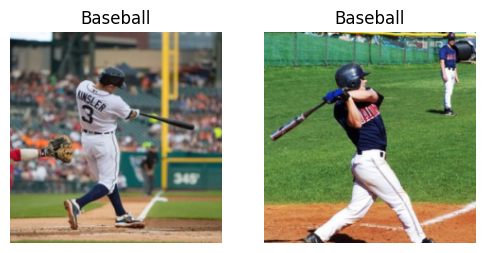

In [9]:
dls.show_batch(nrows=1, ncols=2)

## Training the Model

In [14]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
WANDB_API_KEY = user_secrets.get_secret("WANDB_API_KEY")

wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [11]:
from fastai.callback.wandb import *

# start logging a wandb run
wandb.init(project="crick-pick")

wandb: Currently logged in as: utkarsh736. Use `wandb login --relogin` to force relogin


### resnet18

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate, cbs=WandbCallback())
learn.fine_tune(2)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 117MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.242647,0.432207,0.250000,00:09


epoch,train_loss,valid_loss,error_rate,time
0,1.130384,0.645339,0.333333,00:14
1,1.070749,0.559125,0.416667,00:14


## Interpret

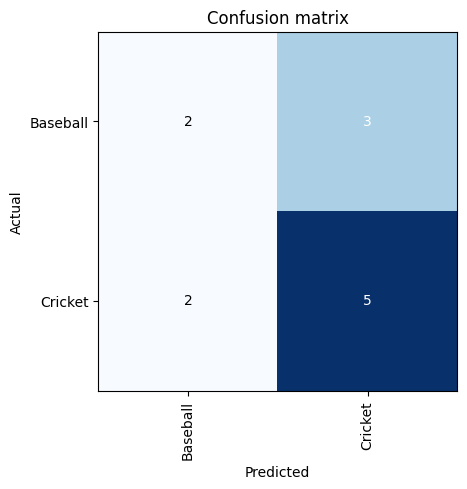

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

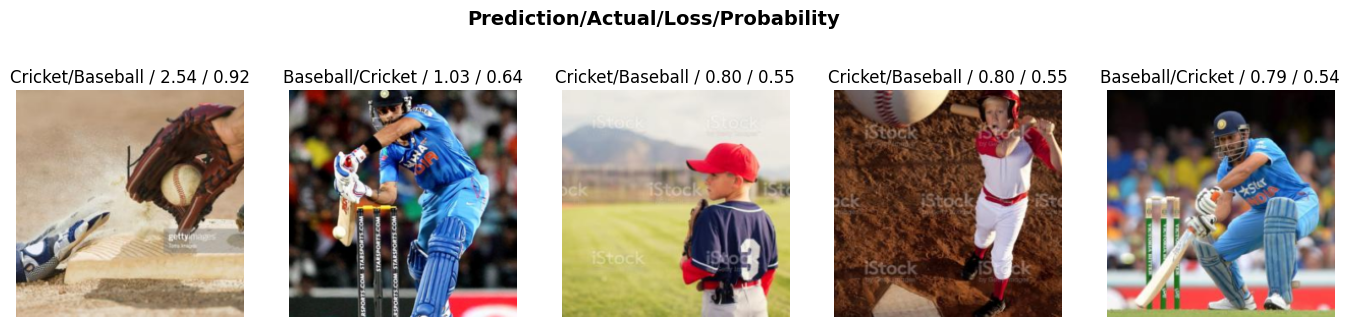

In [16]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))